In [1]:
import numpy as np
import scipy.linalg as linalg
from matplotlib import pyplot as plt

In [2]:
# matplotlib paramters
%matplotlib inline 
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 9
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 20

In [3]:
t = np.linspace(0, 10, 1000)

s1 = np.sin(2 * t)
s2 = np.cos(4 * t)
s3 = 3 * t 
s4 = - np.log(t)

/tmp/ipykernel_61162/1204204487.py:6: RuntimeWarning: divide by zero encountered in log
  s4 = - np.log(t)


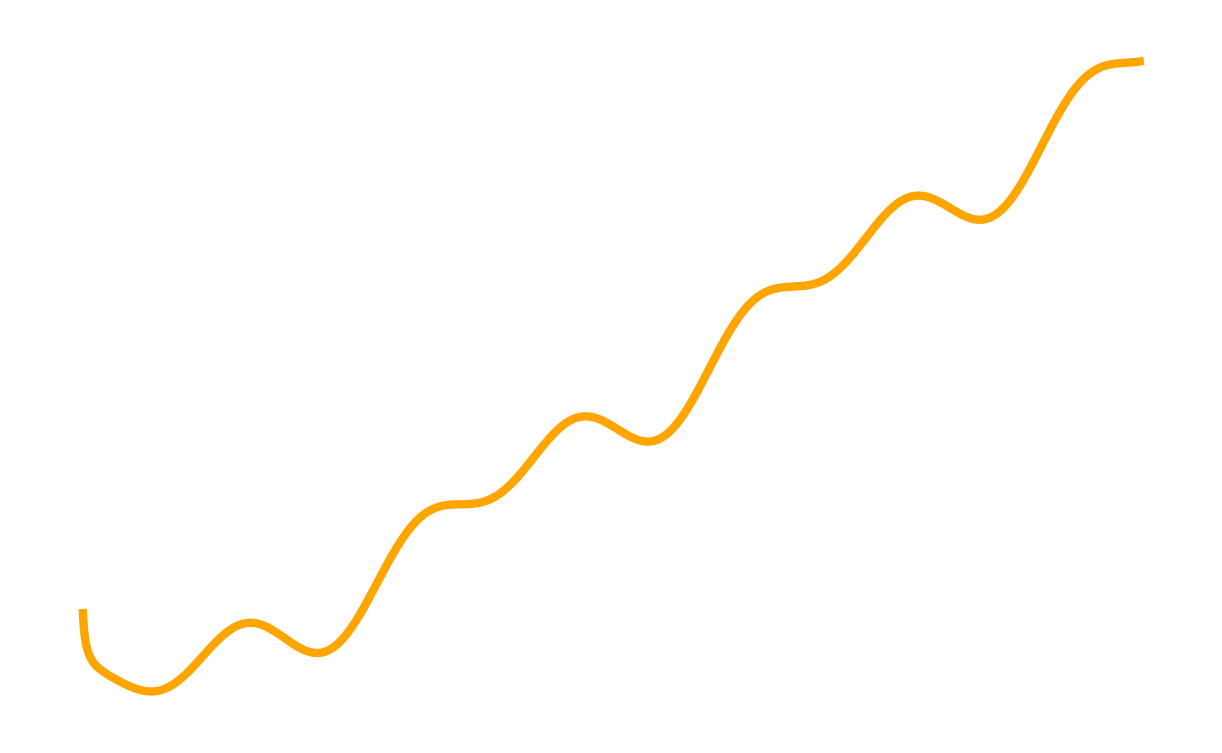

In [11]:
fig, ax = plt.subplots(figsize=(5, 3))

ax.plot(t, s1 + s2 + s3 + s4, color='orange')

ax.axis('off');

fig.savefig('/media/cyrill/DATA/Scientific_Work/figs/decomposition/sum1234.eps', format='eps')

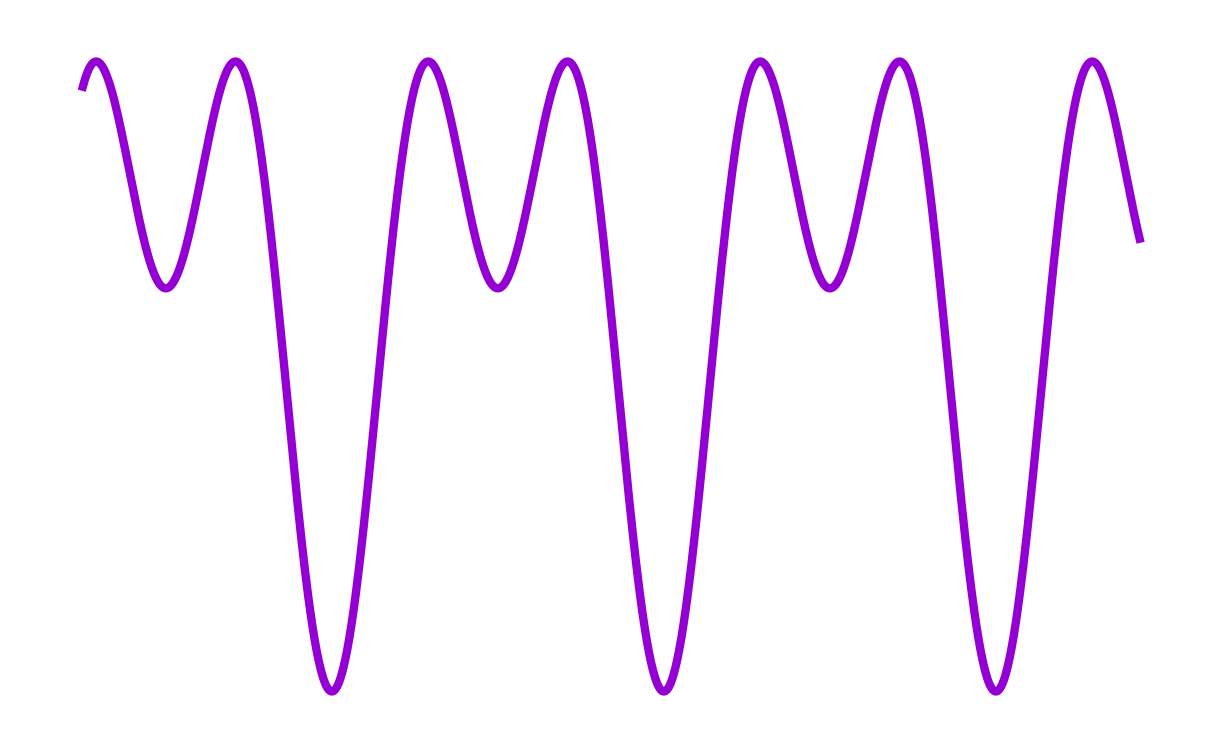

In [12]:
fig, ax = plt.subplots(figsize=(5, 3))

ax.plot(t, s1 + s2, color='darkviolet')

ax.axis('off');

fig.savefig('/media/cyrill/DATA/Scientific_Work/figs/decomposition/sum12.eps', format='eps')

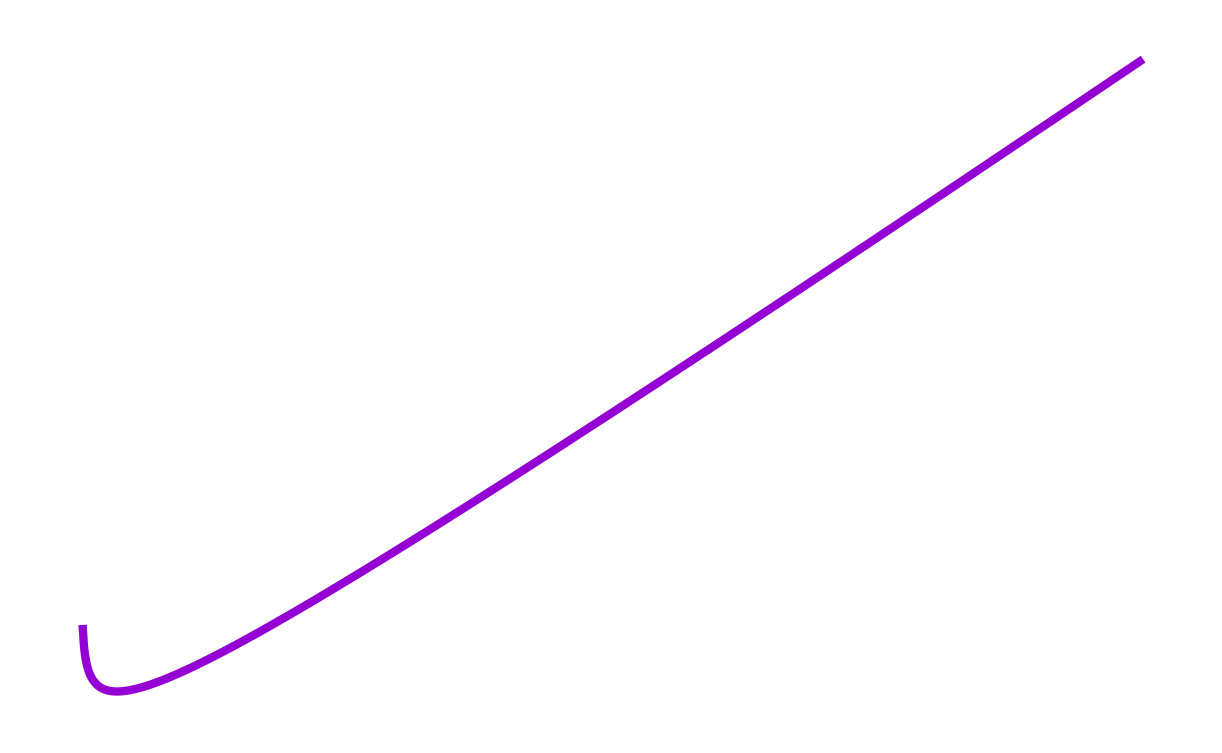

In [13]:
fig, ax = plt.subplots(figsize=(5, 3))

ax.plot(t, s3 + s4, color='darkviolet')

ax.axis('off');

fig.savefig('/media/cyrill/DATA/Scientific_Work/figs/decomposition/sum34.eps', format='eps')

## Single Signals

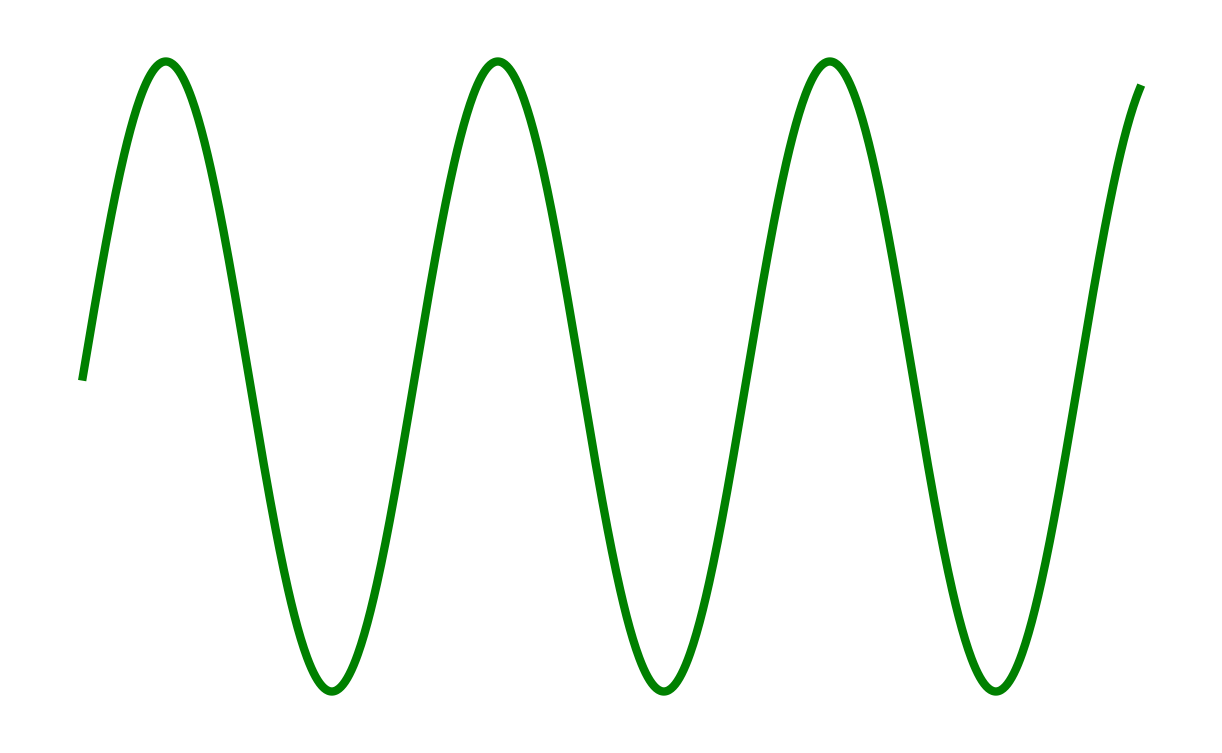

In [14]:
fig, ax = plt.subplots(figsize=(5, 3))

ax.plot(t, s1, color='green')

ax.axis('off');

fig.savefig('/media/cyrill/DATA/Scientific_Work/figs/decomposition/sum1.eps', format='eps')

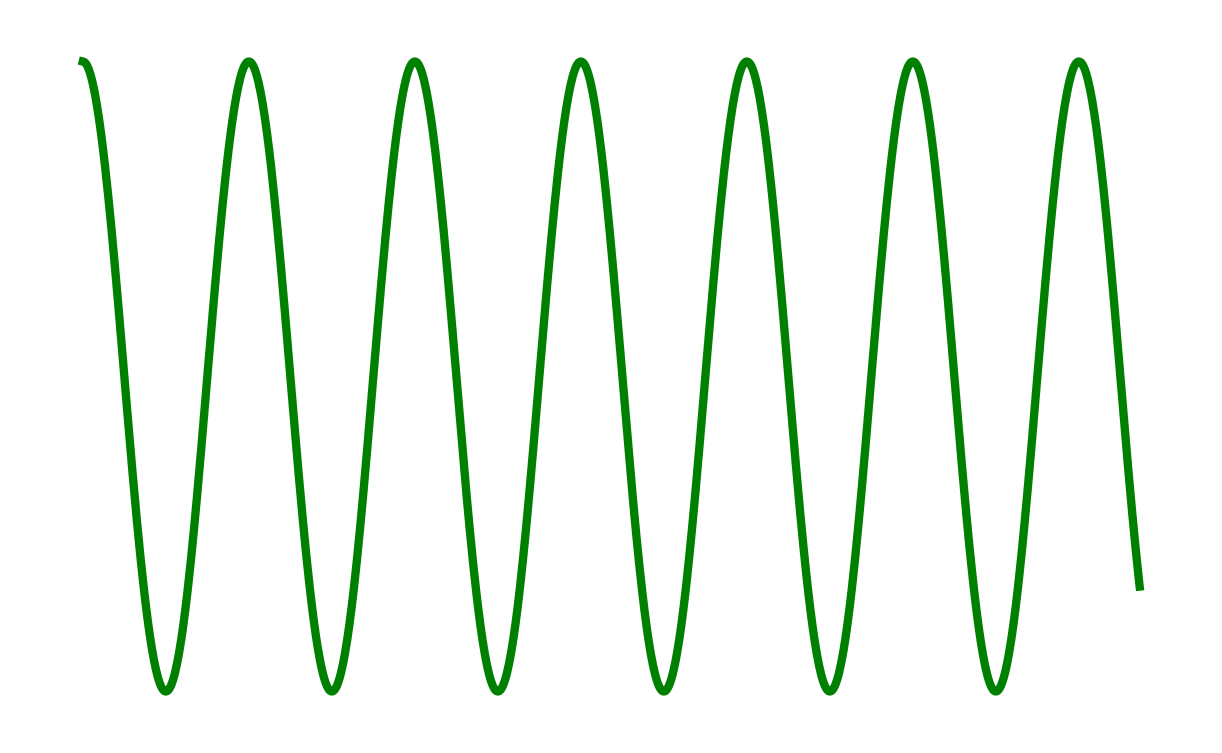

In [15]:
fig, ax = plt.subplots(figsize=(5, 3))

ax.plot(t, s2, color='green')

ax.axis('off');

fig.savefig('/media/cyrill/DATA/Scientific_Work/figs/decomposition/sum2.eps', format='eps')

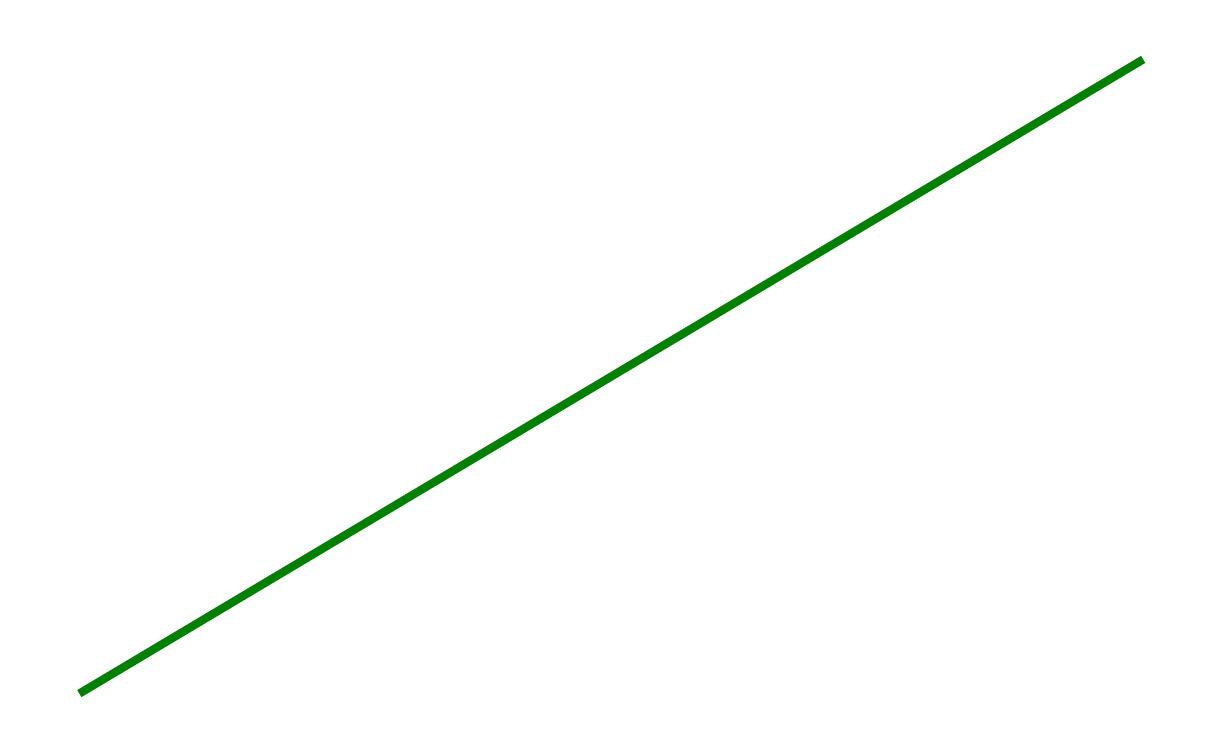

In [16]:
fig, ax = plt.subplots(figsize=(5, 3))

ax.plot(t, s3, color='green')

ax.axis('off');

fig.savefig('/media/cyrill/DATA/Scientific_Work/figs/decomposition/sum3.eps', format='eps')

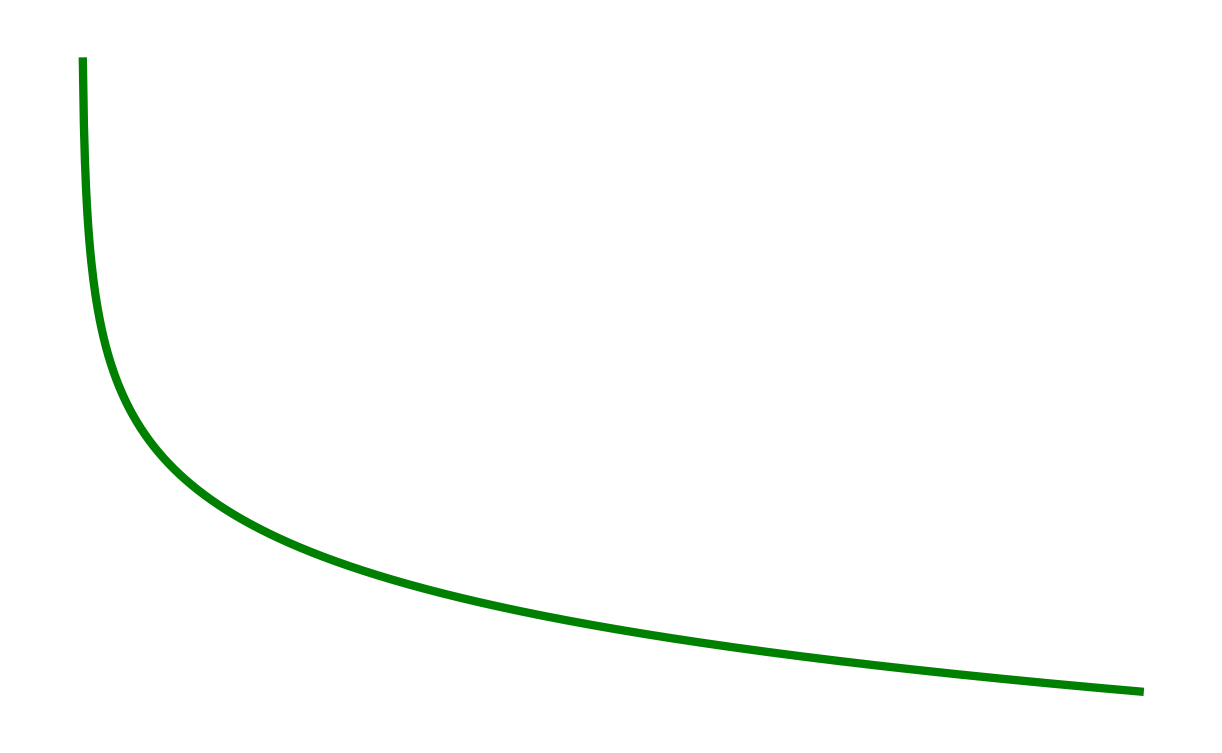

In [17]:
fig, ax = plt.subplots(figsize=(5, 3))

ax.plot(t, s4, color='green')

ax.axis('off');

fig.savefig('/media/cyrill/DATA/Scientific_Work/figs/decomposition/sum4.eps', format='eps')

In [ ]:
def DichotomyPartition(num_components):
    """
    Args:
        num_components: how many components from initial signal is desired 

    Returns:
        factor groups related to the best current  signal decomposition
    """
    # at the start we have one group of factors, which forms hankel trajectory matrix
    partition_list = [[1, 2, 3, ..., r]]
    mean_hankel_resid = 0

    # proceed until we obrain enough groups
    while len(partition_list) < num_components:
        new_partition_list = []

        # disect each group into two optimally within this group
        # FullSearch test all possible partitions into 2 groups
        # and find best in terms of Mean Hankel Residual
        for partition in partition_list:
            sub_partition_1, sub_partition_2 = FullSearch(partition)

            new_partition_list.extend(sub_partition_1, sub_partition_2)

        # calculate Mean Hankel Residual of new partition 
        mean_hankel_resid = CalculateResidual(new_partition_list)

        yield new_partition_list, mean_hankel_resid

        # save new partition
        partition_list = new_partition_list